In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check null values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that Age have 177 values are null,cabin have large values are null

In [5]:
#Lets remove Cabin and Embarked 
titanic_train.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [6]:
# Lets impute the null values with mean or median
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

We see more number of occurances of age is between 24 to 30 so lets impute randomly from 24 to 30

In [8]:
import random
titanic_train['Age']=titanic_train['Age'].fillna(random.randint(24,30))

In [9]:
#again check for null values
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [10]:
#Let's convert the categorical value of Sex to binary[0,1]
titanic_train.Sex.replace(['male','female'],[0,1],inplace=True)

In [11]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


In [12]:
#let's remove name and ticket where these variables don't significantly explain the data
titanic_train.drop(['Ticket','Name'],axis=1,inplace=True)

In [13]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [14]:
X_train=titanic_train.drop('Survived',axis=1)
y_train=titanic_train.Survived

In [15]:
#lets scale the variables of titanic_train
from sklearn.preprocessing import StandardScaler

In [16]:
scale=StandardScaler()
X_train[X_train.columns]=scale.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
X_train.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,-0.042939,0.033632,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.131900,-0.334974,0.083081,0.018443,-0.549500
Sex,-0.042939,-0.131900,1.000000,-0.082949,0.114631,0.245489,0.182333
Age,0.033632,-0.334974,-0.082949,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.057527,0.083081,0.114631,-0.232978,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,0.245489,-0.176486,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.182333,0.093706,0.159651,0.216225,1.000000


In [18]:
print(titanic_train.head())
print(X_train.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500
   PassengerId    Pclass       Sex       Age     SibSp     Parch      Fare
0    -1.730108  0.827377 -0.737695 -0.581659  0.432793 -0.473674 -0.502445
1    -1.726220 -1.566107  1.355574  0.649327  0.432793 -0.473674  0.786845
2    -1.722332  0.827377  1.355574 -0.273913 -0.474545 -0.473674 -0.488854
3    -1.718444 -1.566107  1.355574  0.418517  0.432793 -0.473674  0.420730
4    -1.714556  0.827377 -0.737695  0.418517 -0.474545 -0.473674 -0.486337


In [19]:
#Lets apply RFE(recursive feature elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [21]:
rfe=RFE(model,6)
X_train_rfe=rfe.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
list(zip(X_train.columns, X_train_rfe.support_, X_train_rfe.ranking_))

[('PassengerId', False, 2),
 ('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1)]

In [23]:
X_rfe=X_train.columns[X_train_rfe.support_]
X_rfe_train=X_train[X_rfe]

In [24]:
X_rfe_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.827377,-0.737695,-0.581659,0.432793,-0.473674,-0.502445
1,-1.566107,1.355574,0.649327,0.432793,-0.473674,0.786845
2,0.827377,1.355574,-0.273913,-0.474545,-0.473674,-0.488854
3,-1.566107,1.355574,0.418517,0.432793,-0.473674,0.420730
4,0.827377,-0.737695,0.418517,-0.474545,-0.473674,-0.486337


In [25]:
model.fit(X_rfe_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred=model.predict(X_rfe_train)

In [27]:
from sklearn import metrics

In [28]:
metrics.accuracy_score(y_train,y_pred)

0.7946127946127947

In [29]:
confusion=metrics.confusion_matrix(y_train,y_pred)
print(confusion)

[[465  84]
 [ 99 243]]


In [30]:
metrics.mean_squared_error(y_train,y_pred)

0.2053872053872054

In [31]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [32]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_pred, drop_intermediate = False )
print(fpr , tpr , thresholds)

[0.         0.15300546 1.        ] [0.         0.71052632 1.        ] [2 1 0]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def draw_roc( actual, pred ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, pred,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, pred )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

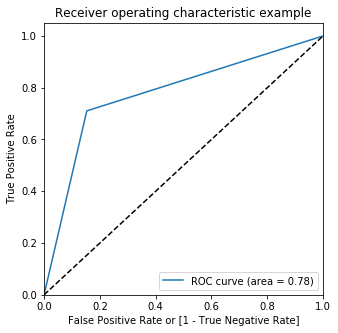

In [35]:
draw_roc(y_train,y_pred)

#lets predict on test data

In [36]:
titanic_test['Age']=titanic_test['Age'].fillna(random.randint(24,30))
titanic_test['Fare']=titanic_test['Fare'].fillna(titanic_test.Fare.mean())

In [37]:
x_test=titanic_test[X_train.columns]

In [38]:
x_test.Sex.replace(['male','female'],[0,1],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [40]:
x_test[x_test.columns]=scale.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.733996,0.827377,-0.737695,0.380049,-0.474545,-0.473674,-0.490783
1,1.737884,0.827377,1.355574,1.341757,0.432793,-0.473674,-0.507479
2,1.741772,-0.369365,-0.737695,2.495806,-0.474545,-0.473674,-0.453367
3,1.745659,0.827377,-0.737695,-0.196976,-0.474545,-0.473674,-0.474005
4,1.749547,0.827377,1.355574,-0.581659,0.432793,0.767630,-0.401017


In [42]:
x_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [43]:
x_test.drop('PassengerId',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
y_test=model.predict(x_test)

In [45]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [46]:
len(y_test)

418

In [47]:
submission=pd.DataFrame({'PassengerId': titanic_test.PassengerId,'Survived':y_test})

In [48]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [50]:
submission.to_csv('survival predictions.csv',index=False)